# Creating Analysis Dataframe
This is to be used after the notebook *'adding_features_copy-final.ipynb'*. <br>
This Jupyter Notebook will take the output dataframes from the earlier notebook to create an avarage S&D dataframe which is used in the analysis <br>

Import necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.interpolate import make_interp_spline, UnivariateSpline
import json
from json import JSONEncoder
import ast
import seaborn as sns

# Display all columns in the df
pd.set_option('display.max_columns', None)
# Set the float format to display numbers in standard decimal notation
pd.options.display.float_format = '{:.5f}'.format

Import S&D dataframe:

In [32]:
df = pd.read_csv('/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/1_PythonScripts/Mainframe/Data/edgeVolume_wFeatures.csv')
df.drop(columns='Unnamed: 0', inplace=True)
unique_values = df['Charge_Supply'].value_counts()
display(df.head())
print('-----------------------------------------------------------')
print(unique_values)
print('-----------------------------------------------------------')
print('Total number of edges in dataframe:', len(df.drop_duplicates(subset=['u', 'v'])))
print('-----------------------------------------------------------')

,u,v,length,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,Name,traffic_id,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec,new_id,Charge_Supply
0,794436,735703,11865.76308,243288,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0]",6,Alna senter,59192V1878201,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,235.70000
1,794436,735703,11865.76308,46650,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0]",2,"Circle K Økern Hurtigladestasjon, Oslo",59192V1878201,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,235.70000
2,794436,735703,11865.76308,46721,LINESTRING (10.733792828475945 59.909993840978...,3,"[44.0, 44.0]",2,"Fortum hurtigladestasjon Kiwi Bjerke, Oslo",59192V1878201,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,235.70000
3,794436,735703,11865.76308,243279,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 150.0, 150.0]",6,Recharge McDonald´s Alnabru,59192V1878201,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,235.70000
4,794436,735703,11865.76308,157384,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",10,Obs Haugenstua,59192V1878201,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,235.70000


-----------------------------------------------------------
1.40000      67
235.70000    38
139.40000    23
123.50000    22
144.10000    21
             ..
4.20000       1
20.50000      1
12.00000      1
3.20000       1
6.60000       1
Name: Charge_Supply, Length: 212, dtype: int64
-----------------------------------------------------------
Total number of edges in dataframe: 416
-----------------------------------------------------------


#### NOTE: Keep in mind the output above about the edges with no CS

Import **ALL** S&D difference dataframes *(every month)*:

In [3]:
# Prepare a list of month abbreviations
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

dfs = {}  # Initialize an empty dictionary to store the DataFrames

for month in months:
    file_path = f'/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/1_PythonScripts/Mainframe/Data/monthlyDataframes/data2_{month}.csv'
    dfs[month] = pd.read_csv(file_path)

# Create individual DataFrames for each month
for month in months:
    exec(f"df_{month} = dfs['{month}']")

### Merge all monthly dataframes into one average dataframe:

In [42]:
dataframes_dict = {'jan': df_jan, 'feb': df_feb, 'mar': df_mar, 'apr': df_apr, 
                   'may': df_may, 'jun': df_jun, 'jul': df_jul, 'aug': df_aug, 
                   'sep': df_sep, 'oct': df_oct, 'nov': df_nov, 'dec': df_dec}

# Initialize the final dataframe with 'u' and 'v' columns from any of the monthly dataframes
df_monthlyAvg = dataframes_dict['jan'][['u', 'v']].copy()

# Loop over all 24 hours
for hour in range(24):
    # Calculate column name for each hour
    hour_str = str(hour).zfill(2)  # convert to two digits (e.g. '01', '02', ..., '23')

    # Initialize a list to store values for each month for this hour
    monthly_values = []

    # Loop over all months (dataframes)
    for month, df in dataframes_dict.items():
        # Calculate column name for this month and hour
        column_name = f'diff_hour_{hour_str}_{month}'

        # Append this month's values to the list
        monthly_values.append(df[column_name])

    # Calculate the average over all months for this hour and store in the final dataframe
    df_monthlyAvg[f'diff_hour_{hour_str}_avg'] = pd.concat(monthly_values, axis=1).mean(axis=1)

df_monthlyAvg

,u,v,diff_hour_00_avg,diff_hour_01_avg,diff_hour_02_avg,diff_hour_03_avg,diff_hour_04_avg,diff_hour_05_avg,diff_hour_06_avg,diff_hour_07_avg,diff_hour_08_avg,diff_hour_09_avg,diff_hour_10_avg,diff_hour_11_avg,diff_hour_12_avg,diff_hour_13_avg,diff_hour_14_avg,diff_hour_15_avg,diff_hour_16_avg,diff_hour_17_avg,diff_hour_18_avg,diff_hour_19_avg,diff_hour_20_avg,diff_hour_21_avg,diff_hour_22_avg,diff_hour_23_avg
0,794436,735703,233.12411,234.05251,234.49227,234.61888,234.37632,232.51349,225.50034,219.78142,220.65727,221.05534,218.33577,215.31320,213.80373,212.80277,210.74367,207.72901,210.14877,214.01403,216.92278,219.94645,222.94599,225.94896,228.75658,231.38299
1,794436,1394577,138.87996,139.06739,139.15617,139.18174,139.13277,138.75668,137.34081,136.18623,136.36306,136.44342,135.89437,135.28415,134.97941,134.77733,134.36162,133.75300,134.24152,135.02187,135.60911,136.21955,136.82512,137.43139,137.99821,138.52845
2,794436,1613461,50.82285,51.82379,52.29790,52.43441,52.17290,50.16452,42.60340,36.43765,37.38193,37.81110,34.87905,31.62031,29.99291,28.91374,26.69375,23.44355,26.05237,30.21964,33.35566,36.61558,39.84948,43.08709,46.11407,48.94568
3,794436,1337200,107.03018,108.49702,109.19182,109.39187,109.00863,106.06542,94.98485,85.94914,87.33296,87.96189,83.66507,78.88949,76.50459,74.92310,71.66978,66.90672,70.72986,76.83685,81.43259,86.20989,90.94907,95.69367,100.12962,104.27925
4,794436,492484,78.53992,79.13825,79.42165,79.50326,79.34693,78.14640,73.62665,69.94099,70.50545,70.76199,69.00932,67.06136,66.08856,65.44347,64.11645,62.17360,63.73306,66.22409,68.09869,70.04735,71.98045,73.91577,75.72519,77.41782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,413112,982587,6.42778,6.48985,6.51925,6.52772,6.51150,6.38695,5.91806,5.53570,5.59426,5.62087,5.43905,5.23696,5.13604,5.06912,4.93145,4.72989,4.89167,5.15010,5.34458,5.54673,5.74728,5.94806,6.13577,6.31137
412,973572,973673,4.65880,4.67365,4.68068,4.68271,4.67883,4.64904,4.53687,4.44540,4.45941,4.46578,4.42228,4.37394,4.34980,4.33379,4.30086,4.25264,4.29134,4.35316,4.39968,4.44804,4.49602,4.54404,4.58895,4.63095
413,973673,987955,4.65610,4.67192,4.67942,4.68158,4.67744,4.64569,4.52617,4.42871,4.44363,4.45042,4.40407,4.35256,4.32683,4.30977,4.27468,4.22331,4.26454,4.33042,4.37999,4.43152,4.48264,4.53382,4.58167,4.62643
414,974905,975169,4.66150,4.67538,4.68195,4.68384,4.68022,4.65238,4.54757,4.46210,4.47519,4.48114,4.44049,4.39532,4.37276,4.35780,4.32703,4.28198,4.31814,4.37590,4.41938,4.46456,4.50939,4.55427,4.59623,4.63548


### Plot The Average Dataframe With All The Other Months:

In [5]:
""" # Add the average dataframe to the dictionary for easy iteration
dataframes_dict['avg'] = df_monthlyAvg

plt.figure(figsize=(12, 6))

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot
    averages = df.drop(['u', 'v'], axis=1).mean()
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in averages.index]
    plt.plot(hours, averages, label=month)

plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Average values for each hour across all months')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # ensure x-axis labels show every hour
plt.show() """


" # Add the average dataframe to the dictionary for easy iteration\ndataframes_dict['avg'] = df_monthlyAvg\n\nplt.figure(figsize=(12, 6))\n\n# Loop over all dataframes\nfor month, df in dataframes_dict.items():\n    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot\n    averages = df.drop(['u', 'v'], axis=1).mean()\n    # Extract hour from column names\n    hours = [int(x.split('_')[2]) for x in averages.index]\n    plt.plot(hours, averages, label=month)\n\nplt.xlabel('Hour')\nplt.ylabel('Average Value')\nplt.title('Average values for each hour across all months')\nplt.legend()\nplt.grid(True)\nplt.xticks(range(24))  # ensure x-axis labels show every hour\nplt.show() "

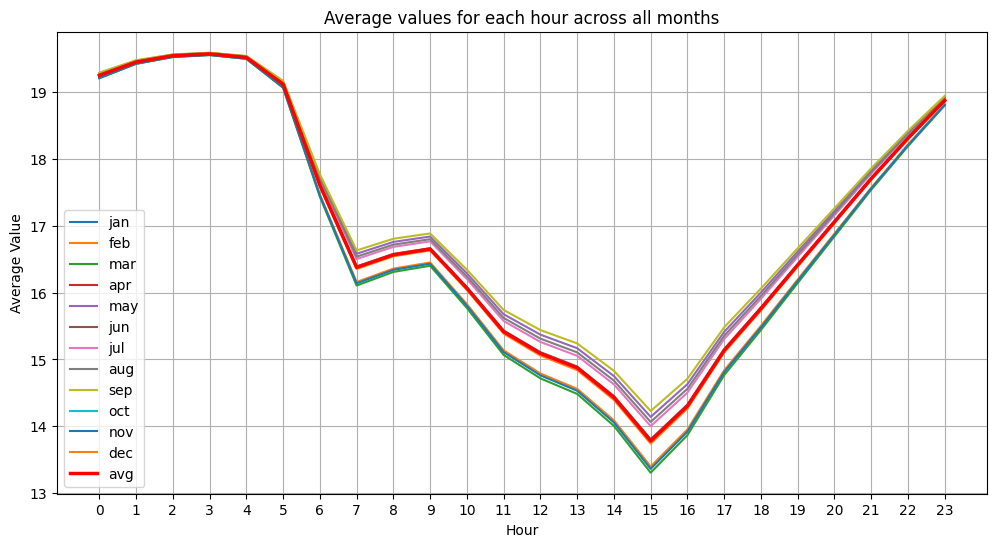

In [43]:
# Add the average dataframe to the dictionary for easy iteration
dataframes_dict['avg'] = df_monthlyAvg

plt.figure(figsize=(12, 6))

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot
    averages = df.drop(['u', 'v'], axis=1).mean()
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in averages.index]
    
    if month == 'avg':
        plt.plot(hours, averages, label=month, linewidth=2.5, color='red') # avg line in green color with more width
    else:
        plt.plot(hours, averages, label=month)

plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Average values for each hour across all months')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # ensure x-axis labels show every hour
plt.show()


The same plot, but the "warm" months in red, and the "cold" months in blue:

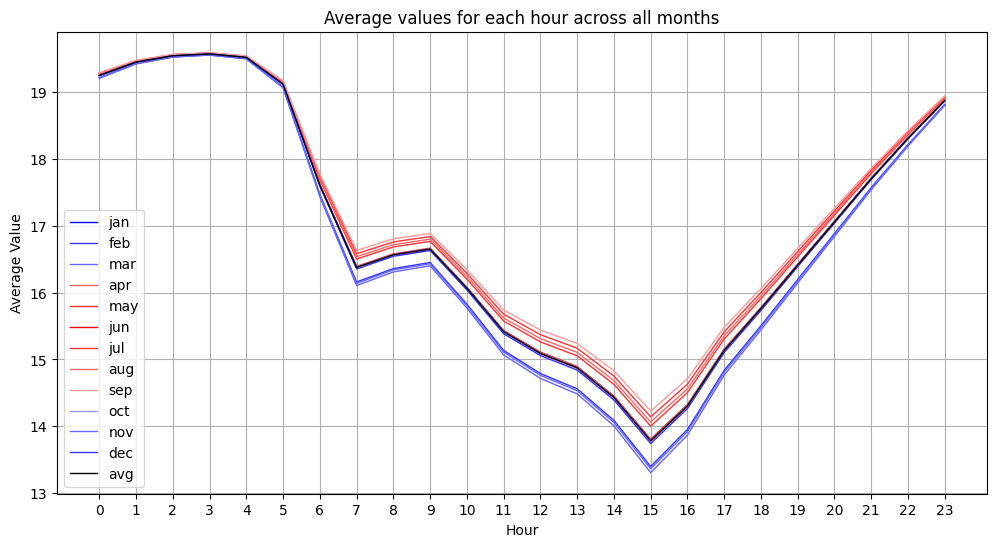

In [53]:
# Define a color dictionary with lighter colors
colors = {"jan": (0, 0, 1), "feb": (0.2, 0.2, 1), "mar": (0.4, 0.4, 1), 
          "apr": (1, 0.4, 0.4), "may": (1, 0.2, 0.2), "jun": (1, 0, 0),
          "jul": (1, 0.2, 0.2), "aug": (1, 0.4, 0.4), "sep": (1, 0.6, 0.6), 
          "oct": (0.6, 0.6, 1), "nov": (0.4, 0.4, 1), "dec": (0.2, 0.2, 1), 
          "avg": "black"}

linewidth = {"jan": 1, "feb": 1, "mar": 1, "apr": 1, "may": 1, "jun": 1,
            "jul": 1, "aug": 1, "sep": 1, "oct": 1, "nov": 1, "dec": 1, 
            "avg": 1}

# Add the average dataframe to the dictionary for easy iteration
dataframes_dict['avg'] = df_monthlyAvg

plt.figure(figsize=(12, 6))

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot
    averages = df.drop(['u', 'v'], axis=1).mean()
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in averages.index]
    plt.plot(hours, averages, color=colors[month], linewidth=linewidth[month], label=month)  # Use the colors dictionary

plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Average values for each hour across all months')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # ensure x-axis labels show every hour
plt.show()


### Plot S&D Difference for 100 Edges in a Heatmap:

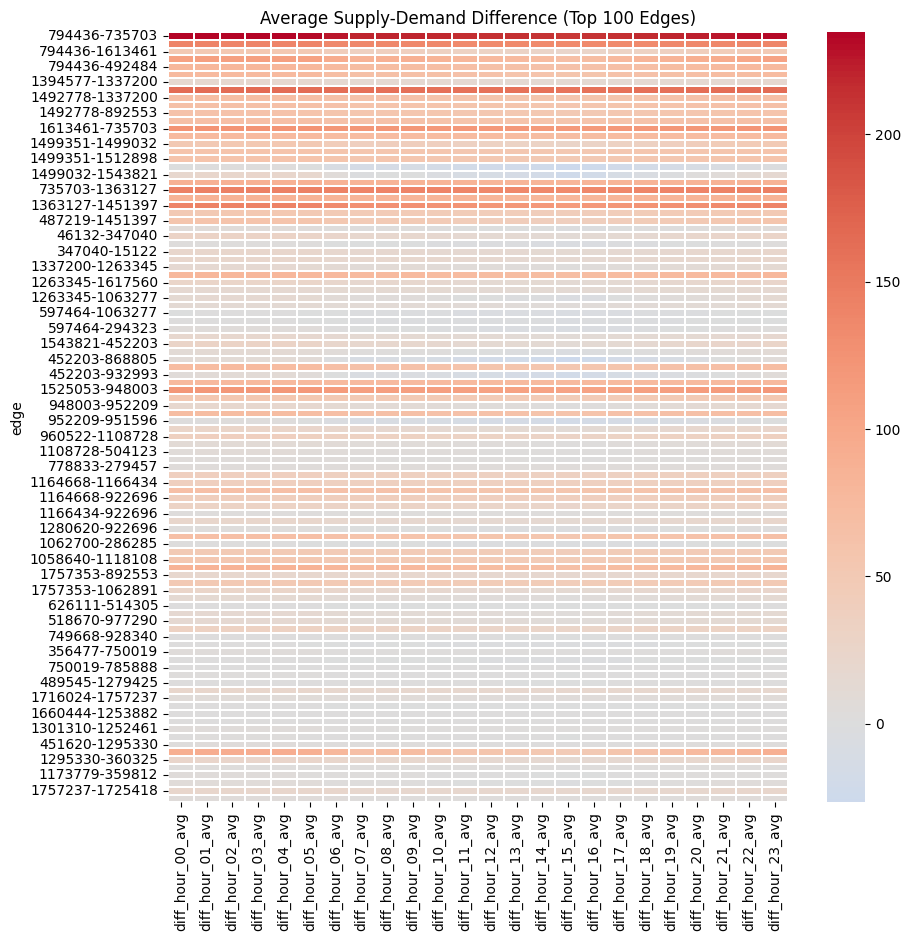

In [8]:
# Prepare the data for the heatmap
data_to_plot = df_monthlyAvg.drop(["u", "v"], axis=1)

# Pivot the data so that rows represent edges and columns represent hours
data_to_plot["edge"] = df_monthlyAvg[["u", "v"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
data_to_plot = data_to_plot.set_index("edge")

# Number of rows to display
num_rows = 100

# Set the figure size
plt.figure(figsize=(10, 10))

# Create the heatmap
sns.heatmap(data_to_plot.head(num_rows), cmap="coolwarm", center=0, linewidths=0.1, linecolor="white")

# Add a title to the plot
plt.title(f"Average Supply-Demand Difference (Top {num_rows} Edges)")

# Show the plot
plt.show()



Check one specific edge S&D difference:

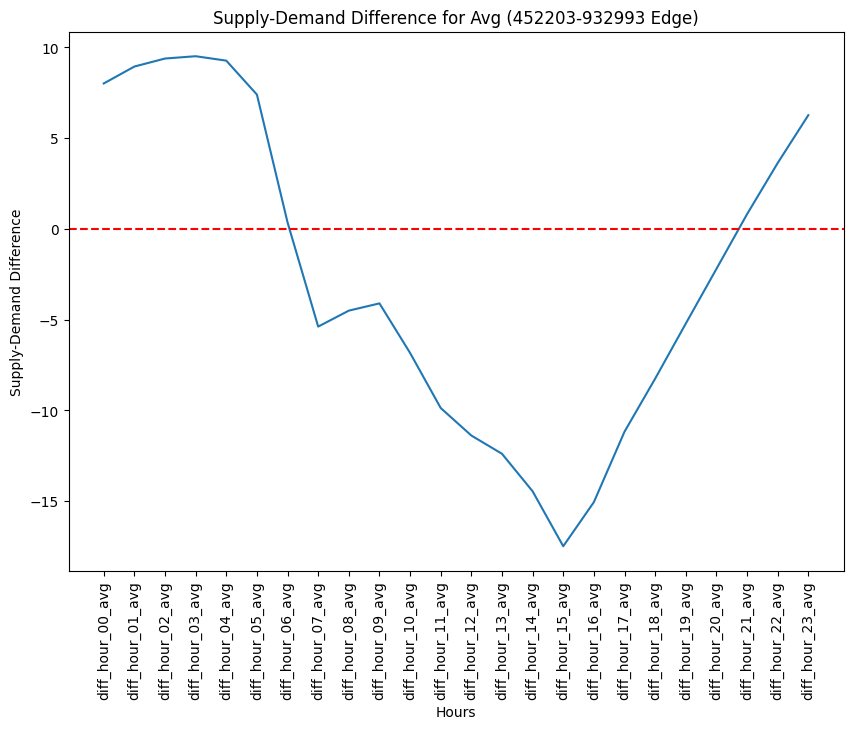

In [9]:
# Choose the specific edge (u, v) you want to visualize
selected_u = 452203
selected_v = 932993

# Prepare the data for the line chart
edge_data = df_monthlyAvg.query("u == @selected_u and v == @selected_v")
edge_data = edge_data.drop(["u", "v"], axis=1).T

# Set the figure size
plt.figure(figsize=(10, 7))
plt.plot(edge_data.index, edge_data.values)     # Create the line chart
plt.xlabel("Hours")                             # Add labels and a title to the plot
plt.ylabel("Supply-Demand Difference")
plt.title(f"Supply-Demand Difference for {month.capitalize()} ({selected_u}-{selected_v} Edge)")
plt.xticks(rotation='vertical')                 # Add vertical x-axis text
plt.axhline(0, color='red', linestyle='--')     # Add a horizontal dashed line at y=0

plt.show()                                      # Show the plot


Same S&D difference, but with all the other months as well: 

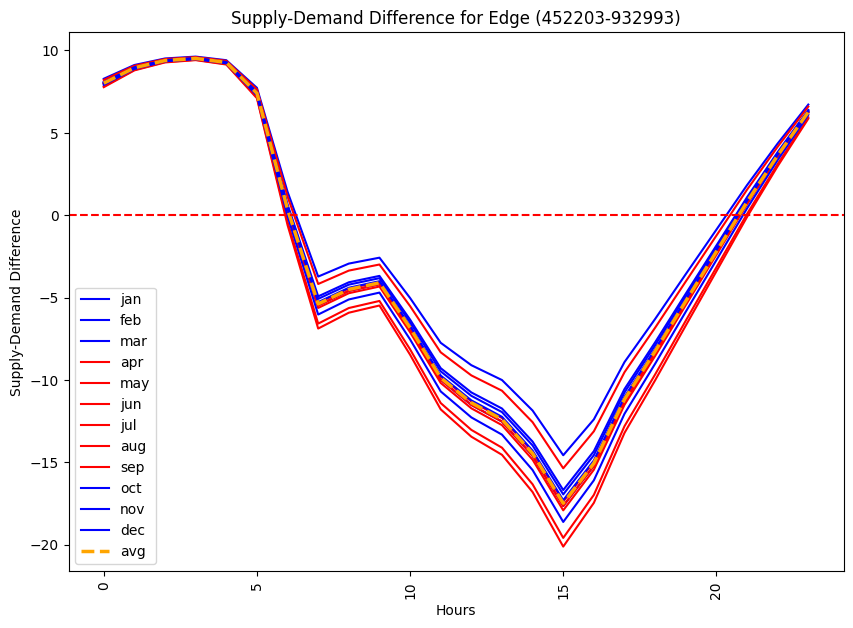

In [10]:
# Choose the specific edge (u, v) you want to visualize
selected_u = 452203#1263345#487219#452203
selected_v = 932993#1063277#46132#932993

plt.figure(figsize=(10, 7))

# Define a color dictionary
colors = {"jan": "blue", "feb": "blue", "mar": "blue", "apr": "red", "may": "red", "jun": "red",
          "jul": "red", "aug": "red", "sep": "red", "oct": "blue", "nov": "blue", "dec": "blue", "avg": "orange"}

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Prepare the data for the line chart
    edge_data = df.query("u == @selected_u and v == @selected_v")
    edge_data = edge_data.drop(["u", "v"], axis=1)
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in edge_data.columns]
    edge_data.columns = hours
    edge_data = edge_data.T

        # Create the line chart with different linewidth and style for 'avg'
    if month == 'avg':
        plt.plot(edge_data.index, edge_data.values.squeeze(), label=month, color=colors[month], linewidth=2.5, linestyle='dashed')
    else:
        plt.plot(edge_data.index, edge_data.values.squeeze(), label=month, color=colors[month])     

plt.xlabel("Hours")                             # Add labels and a title to the plot
plt.ylabel("Supply-Demand Difference")
plt.title(f"Supply-Demand Difference for Edge ({selected_u}-{selected_v})")
plt.xticks(rotation='vertical')                 # Add vertical x-axis text
plt.axhline(0, color='red', linestyle='--')     # Add a horizontal dashed line at y=0
plt.legend()                                    # Add legend to the plot

plt.show()                                      # Show the plot


### Another Heatmap showing served, partially served, and underserved edges:

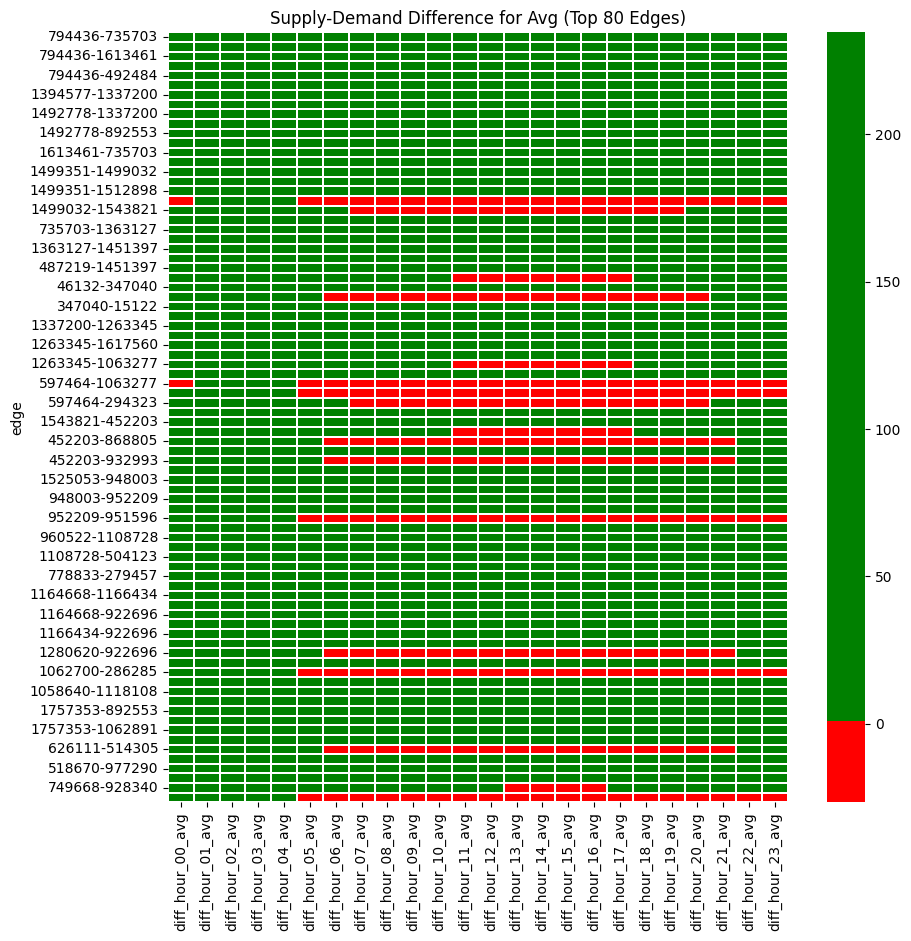

In [11]:
# Prepare the data for the heatmap
data_to_plot = df_monthlyAvg.drop(["u", "v"], axis=1)

# Pivot the data so that rows represent edges and columns represent hours
data_to_plot["edge"] = df_monthlyAvg[["u", "v"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
data_to_plot = data_to_plot.set_index("edge")

# Number of rows to display
num_rows = 80

# Set the figure size
plt.figure(figsize=(10, 10))

# Create custom colormap for the heatmap
custom_cmap = ListedColormap(['red', 'green'])

# Create the heatmap with custom colormap and center at 0
sns.heatmap(data_to_plot.head(num_rows), cmap=custom_cmap, center=0, linewidths=0.1, linecolor="white")

# Add a title to the plot
plt.title(f"Supply-Demand Difference for {month.capitalize()} (Top {num_rows} Edges)")

# Show the plot
plt.show()


## Categorizing edges by being ***Served***, ***Partially Served*** or ***Underserved***:
Also adding a column categorizing *when* the edge is underserved.

In [17]:
# Create new DataFrame to store the classifications
classification_df = pd.DataFrame(index=df_monthlyAvg.index, columns=["edge_classification", "TimeServed"])

# Iterate over the edges
for edge in df_monthlyAvg.index:
    # Get the supply-demand difference values for the edge
    diff_values = df_monthlyAvg.loc[edge, df_monthlyAvg.columns[2:]]
    
    # Classify the overall edge supply-demand difference
    if (diff_values > 0).all():
        classification_df.loc[edge, "edge_classification"] = 1  # All values are positive
    elif (diff_values < 0).all():
        classification_df.loc[edge, "edge_classification"] = -1  # All values are negative
    else:
        classification_df.loc[edge, "edge_classification"] = 0  # Values are mixed (both positive and negative)
    
    # Get the supply-demand difference values for specific time frames
    morning_values = diff_values.filter(regex='diff_hour_0[6-9]_avg|diff_hour_1[0-1]_avg')
    afternoon_values = diff_values.filter(regex='diff_hour_1[2-7]_avg')
    
    # TimeServed classification
    if (morning_values < 0).all() and (afternoon_values >= 0).all():
        classification_df.loc[edge, "TimeServed"] = 'X'  # Negative in the morning (06-11), non-negative in the afternoon (12-17)
    elif (afternoon_values < 0).all() and (morning_values >= 0).all():
        classification_df.loc[edge, "TimeServed"] = 'Y'  # Negative in the afternoon (12-17), non-negative in the morning (06-11)
    elif (morning_values < 0).all() and (afternoon_values < 0).all():
        classification_df.loc[edge, "TimeServed"] = 'Z'  # Negative in both time frames (06-17)
    else:
        classification_df.loc[edge, "TimeServed"] = 0  # A mix of positive and negative values in either or both time frames

# Merge the classification DataFrame with the original DataFrame
df_monthlyAvg = pd.concat([df_monthlyAvg, classification_df], axis=1)

# Display the updated DataFrame
df_monthlyAvg.head()


,u,v,diff_hour_00_avg,diff_hour_01_avg,diff_hour_02_avg,diff_hour_03_avg,diff_hour_04_avg,diff_hour_05_avg,diff_hour_06_avg,diff_hour_07_avg,diff_hour_08_avg,diff_hour_09_avg,diff_hour_10_avg,diff_hour_11_avg,diff_hour_12_avg,diff_hour_13_avg,diff_hour_14_avg,diff_hour_15_avg,diff_hour_16_avg,diff_hour_17_avg,diff_hour_18_avg,diff_hour_19_avg,diff_hour_20_avg,diff_hour_21_avg,diff_hour_22_avg,diff_hour_23_avg,edge_classification,TimeServed
0,794436,735703,233.12411,234.05251,234.49227,234.61888,234.37632,232.51349,225.50034,219.78142,220.65727,221.05534,218.33577,215.31320,213.80373,212.80277,210.74367,207.72901,210.14877,214.01403,216.92278,219.94645,222.94599,225.94896,228.75658,231.38299,1,0
1,794436,1394577,138.87996,139.06739,139.15617,139.18174,139.13277,138.75668,137.34081,136.18623,136.36306,136.44342,135.89437,135.28415,134.97941,134.77733,134.36162,133.75300,134.24152,135.02187,135.60911,136.21955,136.82512,137.43139,137.99821,138.52845,1,0
2,794436,1613461,50.82285,51.82379,52.29790,52.43441,52.17290,50.16452,42.60340,36.43765,37.38193,37.81110,34.87905,31.62031,29.99291,28.91374,26.69375,23.44355,26.05237,30.21964,33.35566,36.61558,39.84948,43.08709,46.11407,48.94568,1,0
3,794436,1337200,107.03018,108.49702,109.19182,109.39187,109.00863,106.06542,94.98485,85.94914,87.33296,87.96189,83.66507,78.88949,76.50459,74.92310,71.66978,66.90672,70.72986,76.83685,81.43259,86.20989,90.94907,95.69367,100.12962,104.27925,1,0
4,794436,492484,78.53992,79.13825,79.42165,79.50326,79.34693,78.14640,73.62665,69.94099,70.50545,70.76199,69.00932,67.06136,66.08856,65.44347,64.11645,62.17360,63.73306,66.22409,68.09869,70.04735,71.98045,73.91577,75.72519,77.41782,1,0


In [18]:
print('------------------------------------------------------------------------------------------')
print('All values are positive (served):', len(df_monthlyAvg.query('edge_classification == 1')))
print('Mixed values (partially served, categorized as underserved):', len(df_monthlyAvg.query('edge_classification == 0')))
print('------------------------------------------------------------------------------------------')
print('Underserved 06 to 17 (or later):', len(df_monthlyAvg.query('TimeServed == "Z"')))
print('Underserved in timeframe 12-17:', len(df_monthlyAvg.query('TimeServed == "Y"')))
print('Underserved in timeframe 06-12:', len(df_monthlyAvg.query('TimeServed == "X"')))


------------------------------------------------------------------------------------------
All values are positive (served): 340
Mixed values (partially served, categorized as underserved): 75
------------------------------------------------------------------------------------------
Underserved 06 to 17 (or later): 21
Underserved in timeframe 12-17: 6
Underserved in timeframe 06-12: 0


### Check With The Monthly Hourly Data:

In [19]:
df2 = pd.read_csv('/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/1_PythonScripts/Mainframe/Data/monthlyDataframes/all_monthly_data.csv')

In [20]:
def classify(row):
    if (row < 0).all():  # all values are negative
        return -1
    elif (row > 0).all():  # all values are positive
        return 1
    else:  # values are mixed
        return 0

In [21]:
diff_hour_cols = [col for col in df2.columns if 'diff_hour' in col]
df2['edge_classification'] = df2[diff_hour_cols].apply(classify, axis=1)
unique_values = df2['edge_classification'].value_counts()
print('------------------------------------------------------------------------------------------')
print('All values are positive (served):', len(df2.query('edge_classification == 1')))
print('Mixed values (partially served, categorized as underserved):', len(df2.query('edge_classification == 0')))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
All values are positive (served): 308
Mixed values (partially served, categorized as underserved): 108
------------------------------------------------------------------------------------------


In [22]:
#df_monthlyAvg.drop(columns='edge_classification', inplace=True)
#df_monthlyAvg.drop(columns='TimeServed', inplace=True)
#df2.drop(columns='edge_classification', inplace=True)

## Store Dataframes:

In [23]:
#path1 = '/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/1_PythonScripts/Mainframe/Data/monthlyDataframes/outputData/avg_SandD_dataframe.csv'
df_monthlyAvg.to_csv(path1, index=False)
#path2 = '/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/1_PythonScripts/Mainframe/Data/monthlyDataframes/outputData/monthlyHourly_SandD_dataframe.csv'
df2.to_csv(path2, index=False)